<a href="https://colab.research.google.com/github/Raries16/Practice/blob/main/Classification_Algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
#Mounting Googel Drive 

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [96]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/KaggleCreditCardCustomers"

In [97]:
#changing the working directory
%cd /content/gdrive/My Drive/KaggleCreditCardCustomers

/content/gdrive/My Drive/KaggleCreditCardCustomers


In [98]:
#Copying API Command from Kaggle Dataset page and pasting it here
#Go to Kaggel Accounts and Generate New API and paste it into Drive Folder where you are working
!kaggle datasets download -d sakshigoyal7/credit-card-customers


  0% 0.00/379k [00:00<?, ?B/s]
100% 379k/379k [00:00<00:00, 25.9MB/s]


In [99]:
!ls

BankChurners.csv  credit-card-customers.zip  kaggle.json  Log_ROC.png


In [100]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  credit-card-customers.zip
replace BankChurners.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [101]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv("BankChurners.csv")

In [103]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [104]:
df['Attrition_Flag'].replace({'Existing Customer': 0} , inplace = True)
df['Attrition_Flag'].replace({'Attrited Customer': 1} , inplace = True)


In [105]:
#Removing Last two columns from our Analysis 
df = df.iloc[:, :-2]
df.head(50)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,0,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,0,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,0,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,0,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,0,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [106]:
#Checking the shape fo the Dataframe
df.shape

(10127, 21)

In [107]:
# Replace spaces in the column names with underscore
df.columns = [c.replace(' ', '_') for c in df.columns]

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [109]:
#Show Basic Statistics
df.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [110]:
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :") 
  
# Print the resultant Dataframe 
duplicate 

# This shows none of the rows are duplicate.

Duplicate Rows :


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [111]:
#Setting CLIENTNUM as Index
df.set_index('CLIENTNUM', inplace=True)

In [112]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [113]:
#Checking for Number of NA values
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

This Shows there isn't any NA values in the dataframe

In [114]:
(df == 'Unknown').sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [115]:
len(df[(df == 'Unknown').any(axis=1)].index)

3046

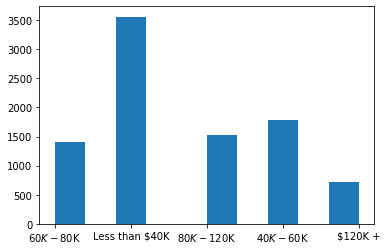

In [116]:
plt.hist(df.loc[df['Income_Category']!='Unknown']['Income_Category']) 
plt.show()

In [117]:
mostfrequentcategory_Marital_Status = df['Marital_Status'].mode()[0]
mostfrequentcategory_Marital_Status

'Married'

In [118]:
df['Marital_Status'].replace({'Unknown': mostfrequentcategory_Marital_Status} , inplace = True)

In [119]:
df['Marital_Status'].head(10)

CLIENTNUM
768805383    Married
818770008     Single
713982108    Married
769911858    Married
709106358    Married
713061558    Married
810347208    Married
818906208    Married
710930508     Single
719661558     Single
Name: Marital_Status, dtype: object

In [120]:
mostfrequentcategory_Income_Category = df['Income_Category'].mode()[0]
mostfrequentcategory_Income_Category
df['Income_Category'].replace({'Unknown': mostfrequentcategory_Income_Category} , inplace = True)

In [121]:
mostfrequentcategory_Education_Level = df['Education_Level'].mode()[0]
mostfrequentcategory_Education_Level
df['Education_Level'].replace({'Unknown': mostfrequentcategory_Education_Level} , inplace = True)

In [122]:
(df == 'Unknown').sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Feature Selection 

In [123]:
df = pd.get_dummies(df, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [124]:
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
768805383,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
818770008,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
713982108,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
769911858,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0
709106358,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0


In [125]:
df.shape

(10127, 35)

In [126]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

In [127]:
from sklearn.ensemble import ExtraTreesClassifier

[0.03311824 0.02713059 0.03220117 0.06589964 0.04043696 0.0470653
 0.03363352 0.10772468 0.03296073 0.04594361 0.1138561  0.16196867
 0.0764715  0.04629561 0.00680499 0.00638522 0.00737494 0.00539391
 0.01297388 0.00992493 0.00580372 0.00869933 0.00571084 0.0120886
 0.01154152 0.00494497 0.00776574 0.00566514 0.0065208  0.00722479
 0.00421636 0.00182372 0.00070882 0.00372145]


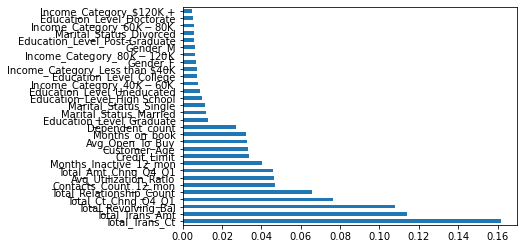

In [128]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

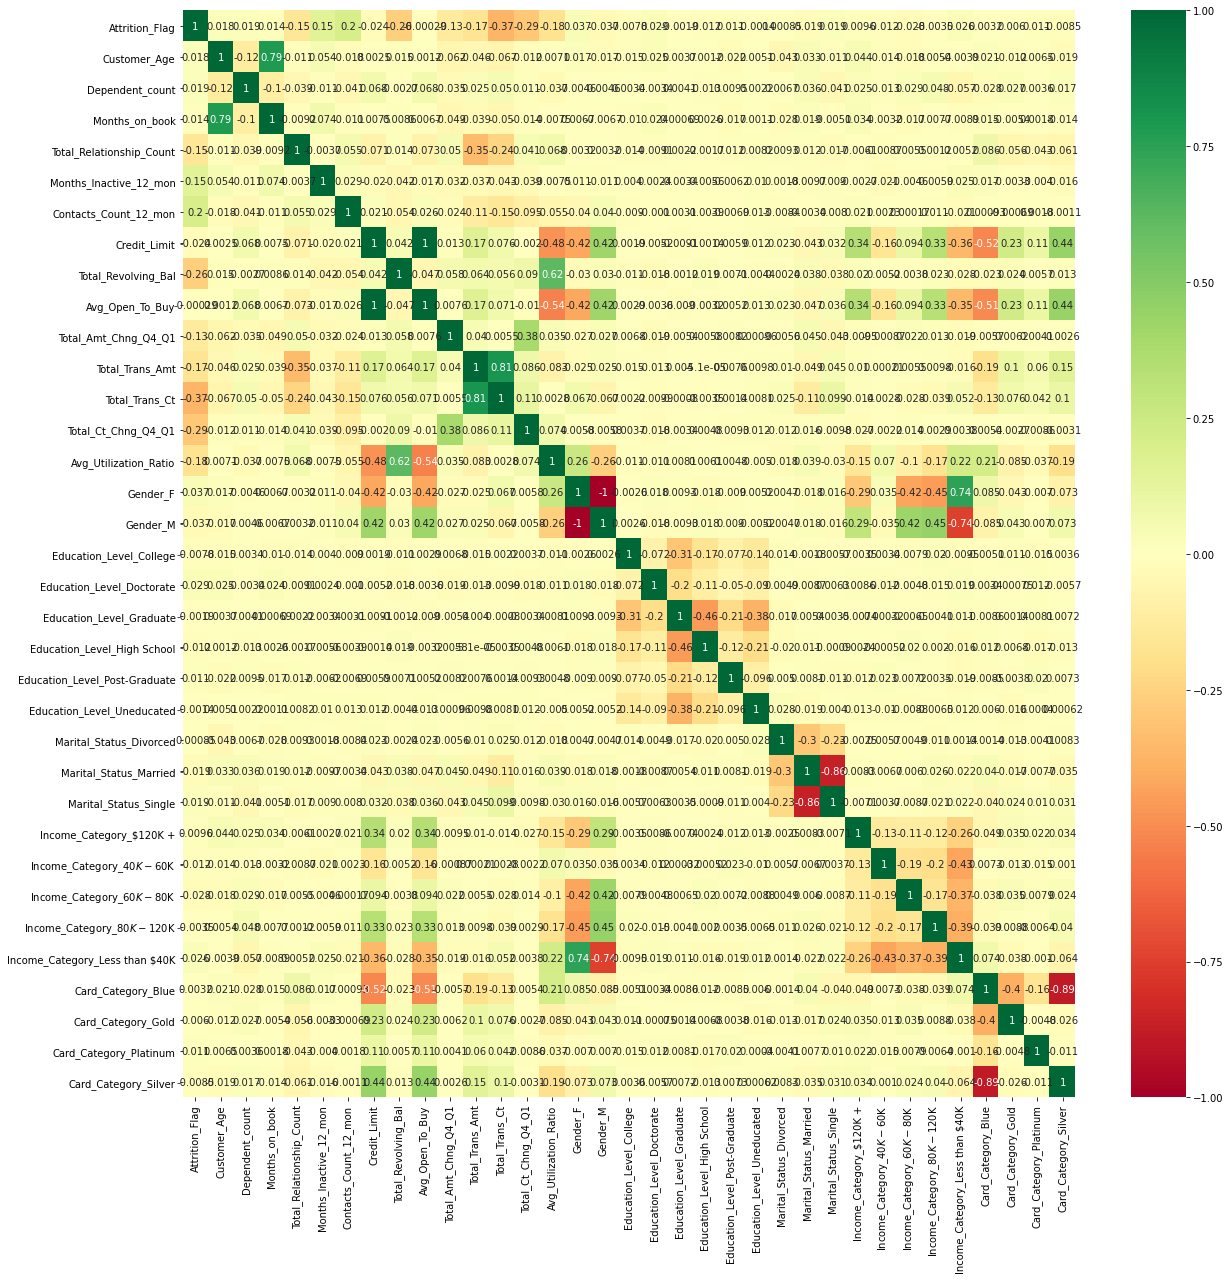

In [129]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Pearson Correlation

In [130]:
num_feats=20
feature_name = X.columns.tolist()
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')


20 selected features


In [131]:
cor_feature

['Months_on_book',
 'Customer_Age',
 'Dependent_count',
 'Marital_Status_Single',
 'Marital_Status_Married',
 'Credit_Limit',
 'Income_Category_Less than $40K',
 'Income_Category_$60K - $80K',
 'Education_Level_Doctorate',
 'Gender_F',
 'Gender_M',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Total_Trans_Amt',
 'Avg_Utilization_Ratio',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Total_Ct_Chng_Q4_Q1',
 'Total_Trans_Ct']

Chi-Square Features

In [132]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

20 selected features


In [133]:
chi_feature

['Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Gender_F',
 'Gender_M',
 'Education_Level_Doctorate',
 'Education_Level_Post-Graduate',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Income_Category_$40K - $60K',
 'Income_Category_$60K - $80K',
 'Income_Category_Less than $40K',
 'Card_Category_Platinum']

Recursive Feature Elimination

In [134]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(solver = 'liblinear'), n_features_to_select=num_feats, step=10,  verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 34 features.
Fitting estimator with 24 features.


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='liblinear',
                                 tol=0.0001, verbose=0, warm_start=False),
    n_features_to_select=20, step=10, verbose=5)

In [135]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

20 selected features


In [136]:
rfe_feature

['Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Gender_F',
 'Gender_M',
 'Marital_Status_Divorced',
 'Marital_Status_Single',
 'Income_Category_$120K +',
 'Income_Category_$80K - $120K',
 'Card_Category_Gold',
 'Card_Category_Platinum',
 'Card_Category_Silver']

Lasso: SelectFromMode

In [137]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1", solver = 'liblinear'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=20, norm_order=1, prefit=False, threshold=None)

In [138]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

20 selected features


In [139]:
embeded_lr_feature

['Customer_Age',
 'Dependent_count',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Gender_F',
 'Education_Level_Doctorate',
 'Education_Level_Post-Graduate',
 'Marital_Status_Divorced',
 'Marital_Status_Single',
 'Income_Category_$120K +',
 'Income_Category_$80K - $120K',
 'Card_Category_Blue',
 'Card_Category_Gold']

In [140]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Logistics,Total
1,Total_Trans_Ct,True,True,True,True,4
2,Total_Trans_Amt,True,True,True,True,4
3,Total_Revolving_Bal,True,True,True,True,4
4,Total_Relationship_Count,True,True,True,True,4
5,Total_Ct_Chng_Q4_Q1,True,True,True,True,4
6,Total_Amt_Chng_Q4_Q1,True,True,True,True,4
7,Months_Inactive_12_mon,True,True,True,True,4
8,Marital_Status_Single,True,True,True,True,4
9,Gender_F,True,True,True,True,4
10,Credit_Limit,True,True,True,True,4


In [141]:
features = ['Total_Trans_Ct' , 'Total_Trans_Amt' , 'Total_Revolving_Bal' , 'Total_Relationship_Count' , 'Total_Ct_Chng_Q4_Q1',
            'Total_Amt_Chng_Q4_Q1' , 'Months_Inactive_12_mon' , 'Marital_Status_Single' , 'Gender_F' , 'Credit_Limit' , 
            'Contacts_Count_12_mon']

In [142]:
X = X[features]

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

MODEL BUILDING 

In [145]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve


In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

1) Logistic Regression

In [147]:
model_lr = LogisticRegression(solver = 'liblinear')
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
print("Coefficients of the Logistic Regression model")
coef = model_lr.coef_
intercept = model_lr.intercept_
print("Coef:", coef)
print("Intercept:", intercept)

Coefficients of the Logistic Regression model
Coef: [[-9.24998184e-02  3.77797335e-04 -8.82820028e-04 -1.65478386e-01
  -5.39056646e-02  3.75726953e-02  5.89689255e-01  1.03354245e-01
   1.92452920e-01  3.46165326e-07  6.58404997e-01]]
Intercept: [0.15137408]


In [149]:
predicted_classes_lr = model_lr.predict(X_test)


In [150]:
predicted_classes_lr_prob = model_lr.predict_proba(X_test)


Confusion matrix for LR model:
[[2471   72]
 [ 299  197]]


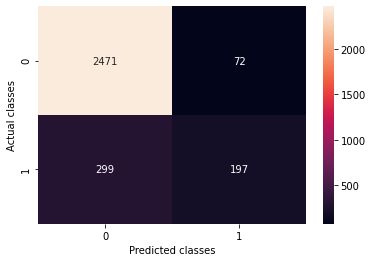

In [151]:
print("Confusion matrix for LR model:")
conf_mat_lr = confusion_matrix(y_test.tolist(), predicted_classes_lr)
print(conf_mat_lr)
sns.heatmap(conf_mat_lr, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

In [152]:
accuracy_lr = accuracy_score(y_test, predicted_classes_lr)
print("accuracy score for LR model::", accuracy_lr)

accuracy score for LR model:: 0.8779203685422836


ROC Curve and then calculate threshold probabilty

*   List item
*   List item



In [153]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

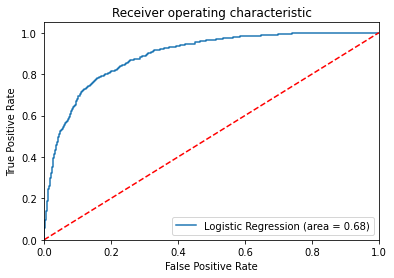

In [154]:
logit_roc_auc = roc_auc_score(y_test, model_lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [155]:
def find_best_threshold(threshould, fpr, tpr):
   t = threshould[np.argmax(tpr*(1-fpr))]
   # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
   print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
   return t

In [156]:
from math import *

In [157]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, model_lr.predict_proba(X_test)[:,1])
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.183734


In [158]:
THRESHOLD = 0.183734

In [159]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

In [160]:
preds = np.where(model_lr.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.830207
recall,0.780242
precision,0.487406
roc_auc_score,0.810097


2) Gaussian Naive Bayes

In [161]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [162]:
predicted_classes_nb = model_nb.predict(X_test)

Confusion matrix for NB model:
[[2396  147]
 [ 193  303]]


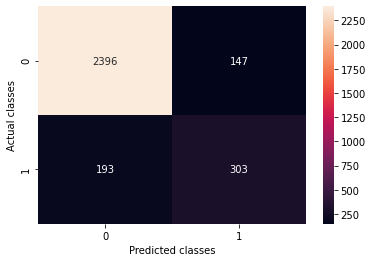

In [163]:
print("Confusion matrix for NB model:")
conf_mat_nb = confusion_matrix(y_test.tolist(), predicted_classes_nb)
print(conf_mat_nb)
sns.heatmap(conf_mat_nb, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

In [164]:
accuracy_nb = accuracy_score(y_test, predicted_classes_nb)
print("accuracy score for NB model::", accuracy_nb)

accuracy score for NB model:: 0.8881210924646266


3) KNN Nodel

In [165]:
model_knn = KNeighborsClassifier(n_neighbors = 2)
# fitting model
model_knn.fit(X_train,y_train)
#predict
predicted_classes_knn = model_knn.predict(X_test)

Confusion matrix for KNN model:
[[2484   59]
 [ 309  187]]


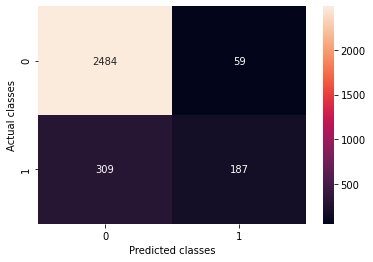

In [166]:
print("Confusion matrix for KNN model:")
conf_mat_knn = confusion_matrix(y_test.tolist(), predicted_classes_knn)
print(conf_mat_knn)
sns.heatmap(conf_mat_knn, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

In [167]:
accuracy_knn = accuracy_score(y_test, predicted_classes_knn)
print("accuracy score for KNN model::", accuracy_knn)

accuracy score for KNN model:: 0.8789075353734781


In [168]:
from sklearn.model_selection import cross_val_score

In [169]:
neighbors = list(range(1,10,2))
# empty list that will hold cv scores
cv_scores = [ ]
#perform 10-fold cross-validation
for K in neighbors:
    model_knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(model_knn,X_train,y_train,cv = 10,scoring =
    "accuracy")
    cv_scores.append(scores.mean())

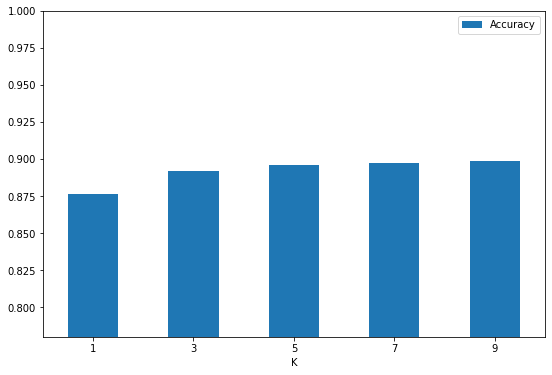

In [170]:
def plot_accuracy(knn_list_scores):
    pd.DataFrame({"K":[i for i in range(1,10,2)],
                  "Accuracy":knn_list_scores}).set_index("K").plot.bar(figsize= (9,6),ylim=(0.78,1.00),rot=0)
    plt.show()
plot_accuracy(cv_scores)

n = 3 is the optimal value

In [171]:
model_knn = KNeighborsClassifier(n_neighbors = 3)
# fitting model
model_knn.fit(X_train,y_train)
#predict
predicted_classes_knn = model_knn.predict(X_test)

Confusion matrix for KNN model:
[[2404  139]
 [ 225  271]]


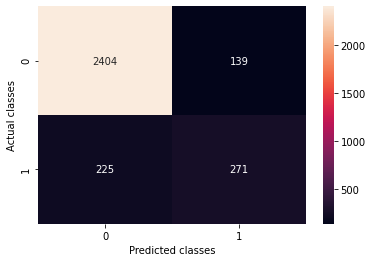

In [172]:
print("Confusion matrix for KNN model:")
conf_mat_knn = confusion_matrix(y_test.tolist(), predicted_classes_knn)
print(conf_mat_knn)
sns.heatmap(conf_mat_knn, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

In [173]:
accuracy_knn = accuracy_score(y_test, predicted_classes_knn)
print("accuracy score for KNN model::", accuracy_knn)

accuracy score for KNN model:: 0.8802237578150708


4) Decision Tree

In [174]:
from sklearn.tree import DecisionTreeClassifier


Confusion matrix for DT model:
[[2459   84]
 [ 124  372]]


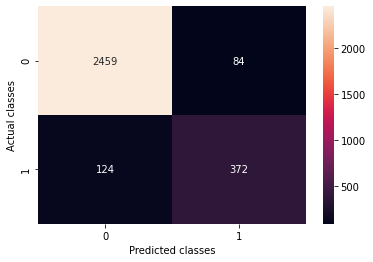

accuracy score  for DT model:: 0.9315564330371833


In [175]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
DecisionTreeClassifier()
predicted_classes_dt = model_dt.predict(X_test)
print("Confusion matrix for DT model:")
conf_mat_dt = confusion_matrix(y_test.tolist(), predicted_classes_dt)
print(conf_mat_dt)
sns.heatmap(conf_mat_dt, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

accuracy_dt = accuracy_score(y_test, predicted_classes_dt)
print("accuracy score  for DT model::", accuracy_dt)

Confusion matrix for DT model:
[[2450   93]
 [  97  399]]


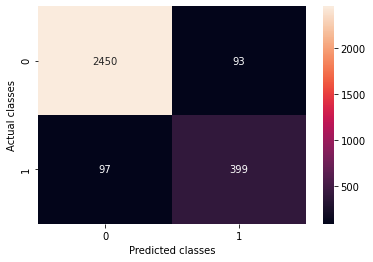

accuracy score  for DT model:: 0.9374794340243501


In [176]:
model_dt = DecisionTreeClassifier(criterion = 'entropy')
model_dt.fit(X_train,y_train)
predicted_classes_dt = model_dt.predict(X_test)

print("Confusion matrix for DT model:")
conf_mat_dt = confusion_matrix(y_test.tolist(), predicted_classes_dt)
print(conf_mat_dt)
sns.heatmap(conf_mat_dt, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

accuracy_dt = accuracy_score(y_test, predicted_classes_dt)
print("accuracy score  for DT model::", accuracy_dt)

Random Forest

Confusion matrix for RF model:
[[2509   34]
 [  93  403]]


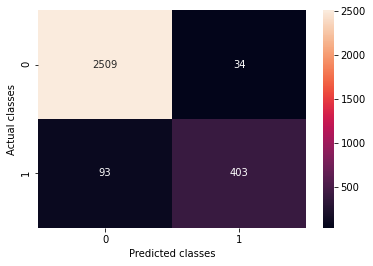

accuracy score for RF model:: 0.9582099374794341


In [177]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

predicted_classes_rf = model_rf.predict(X_test)
print("Confusion matrix for RF model:")
conf_mat_rf = confusion_matrix(y_test.tolist(), predicted_classes_rf)
print(conf_mat_rf)
sns.heatmap(conf_mat_rf, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

accuracy_rf = accuracy_score(y_test, predicted_classes_rf)
print("accuracy score for RF model::", accuracy_rf)

Confusion matrix for RF model:
[[2506   37]
 [  89  407]]


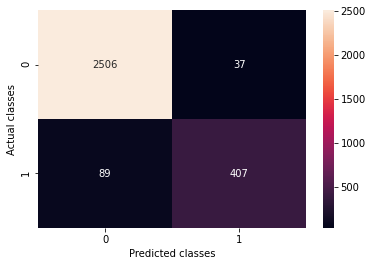

accuracy score for RF model:: 0.9585389930898321


In [178]:
model_rf = RandomForestClassifier(criterion = 'entropy')
model_rf.fit(X_train,y_train)
predicted_classes_rf = model_rf.predict(X_test)

print("Confusion matrix for RF model:")
conf_mat_rf = confusion_matrix(y_test.tolist(), predicted_classes_rf)
print(conf_mat_rf)
sns.heatmap(conf_mat_rf, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

accuracy_rf = accuracy_score(y_test, predicted_classes_rf)
print("accuracy score for RF model::", accuracy_rf)

6) Support Vector Machine

Confusion matrix for SVM model:
[[2543    0]
 [ 496    0]]


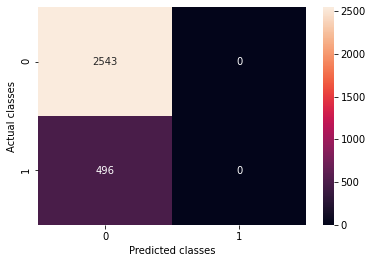

accuracy score for SVM model:: 0.836788417242514


In [179]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train,y_train)

predicted_classes_svm = model_svm.predict(X_test)
print("Confusion matrix for SVM model:")
conf_mat_svm = confusion_matrix(y_test.tolist(), predicted_classes_svm)
print(conf_mat_svm)
sns.heatmap(conf_mat_svm, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()


accuracy_svm = accuracy_score(y_test, predicted_classes_svm)
print("accuracy score for SVM model::", accuracy_svm)

7) SGDC Classifier

Confusion matrix for SGDC model:
[[2543    0]
 [ 496    0]]


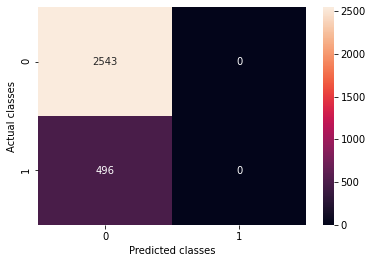

accuracy score for SGDC model:: 0.836788417242514


In [180]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
model_sgdc = OneVsRestClassifier(SGDClassifier())
model_sgdc.fit(X_train,y_train)

predicted_classes_sgdc = model_sgdc.predict(X_test)
print("Confusion matrix for SGDC model:")
conf_mat_sgdc = confusion_matrix(y_test.tolist(), predicted_classes_sgdc)
print(conf_mat_sgdc)
sns.heatmap(conf_mat_sgdc, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()


accuracy_sgdc = accuracy_score(y_test, predicted_classes_sgdc)
print("accuracy score for SGDC model::", accuracy_sgdc)

8) Linear Discriminant Analysis

Confusion matrix for LDA model:
[[2445   98]
 [ 208  288]]


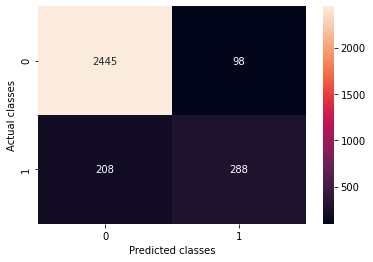

accuracy score for LDA model:: 0.8993089832181639


In [181]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train,y_train)
predicted_classes_lda = model_lda.predict(X_test)

print("Confusion matrix for LDA model:")
conf_mat_lda = confusion_matrix(y_test.tolist(), predicted_classes_lda)
print(conf_mat_lda)
sns.heatmap(conf_mat_lda, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

accuracy_lda = accuracy_score(y_test, predicted_classes_lda)
print("accuracy score for LDA model::", accuracy_lda)